In [1]:
%pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual filename of your Excel file
file_path = '7ff16364-dc86-4910-8784-145545467955.xlsx'

# Read the Excel file
df = pd.read_excel(file_path, dtype={'tonnes/TEU': str})

# Handle non-numeric values by replacing them with NaN and then drop those rows or replace them with a value
df['tonnes/TEU'] = pd.to_numeric(df['tonnes/TEU'].str.replace(',', '.'), errors='coerce')

# You might want to drop rows with NaN if they are not significant
df = df.dropna(subset=['tonnes/TEU'])

# Alternatively, you can fill NaN values with a specific number, like the mean or median of the column
# df['tonnes/TEU'].fillna(df['tonnes/TEU'].mean(), inplace=True)

# Calculate total amount of shipments
total_shipments = len(df)

# Calculate the mean tonnes/TEU
mean_tonnes_per_teu = df['tonnes/TEU'].mean()

# Calculate the standard deviation
std_deviation = df['tonnes/TEU'].std()

# Find the max and min tonnes/TEU
max_value = df['tonnes/TEU'].max()
min_value = df['tonnes/TEU'].min()

# Print the results
print(f"Total shipments: {total_shipments}")
print(f"Mean tonnes/TEU: {mean_tonnes_per_teu:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Max tonnes/TEU: {max_value}")
print(f"Min tonnes/TEU: {min_value}")


Total shipments: 223773
Mean tonnes/TEU: 7.03
Standard Deviation: 5.54
Max tonnes/TEU: 28.5
Min tonnes/TEU: 0.1


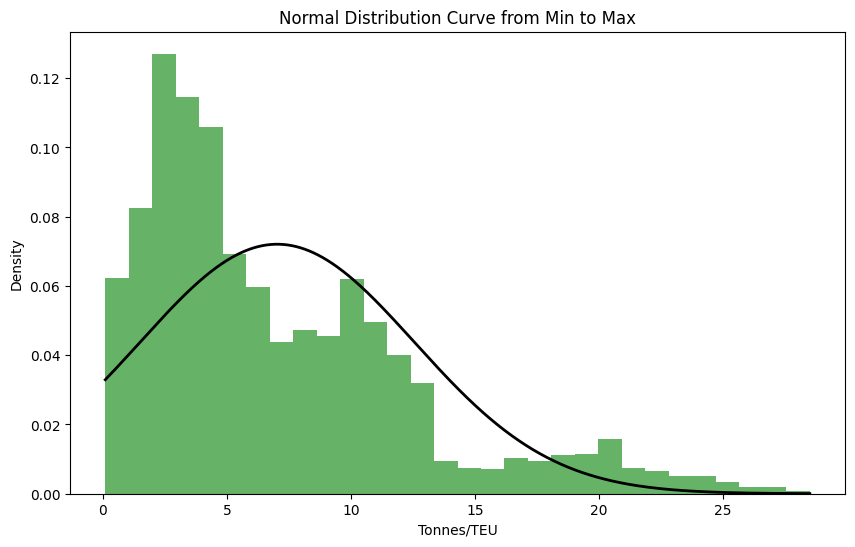

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '7ff16364-dc86-4910-8784-145545467955.xlsx'
df = pd.read_excel(file_path)

# Ensure the column is interpreted as string
df['tonnes/TEU'] = df['tonnes/TEU'].astype(str)

# Replace comma with dot and convert to numeric
df['tonnes/TEU'] = pd.to_numeric(df['tonnes/TEU'].str.replace(',', '.'), errors='coerce')

# Drop rows with NaN values that resulted from coercion
df.dropna(subset=['tonnes/TEU'], inplace=True)

# Calculate the mean and standard deviation of the data
mean = df['tonnes/TEU'].mean()
std_dev = df['tonnes/TEU'].std()

# Create a range of x values from the min to the max of the data
x = np.linspace(df['tonnes/TEU'].min(), df['tonnes/TEU'].max(), 1000)

# Create the bell curve (normal distribution) values manually
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(df['tonnes/TEU'], bins=30, density=True, alpha=0.6, color='g')

# Plot the bell curve
plt.plot(x, pdf, 'k', linewidth=2)

# Set the title and labels
plt.title('Normal Distribution Curve from Min to Max')
plt.xlabel('Tonnes/TEU')
plt.ylabel('Density')

# Show the plot
plt.show()
